# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

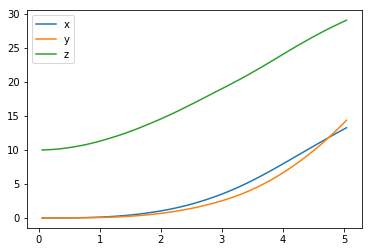

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

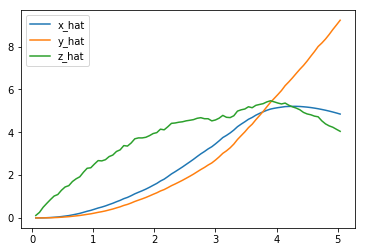

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

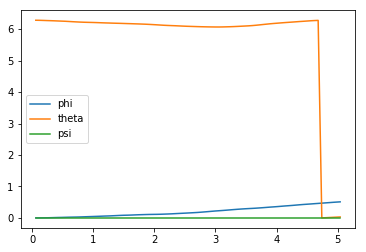

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

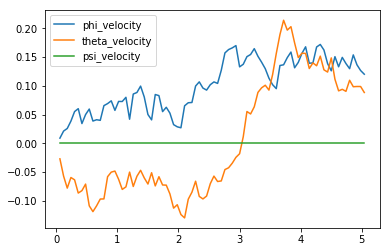

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

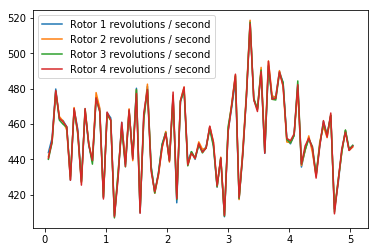

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 13.26911552  14.36346905  29.07440881   0.51061906   0.03058834   0.        ]
[ 4.84919291  9.23022502  4.04348611]
[ 0.12027194  0.08849702  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = 233.085 (best = 295.806), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.Actor import Actor
from agents.ddpg import DDPG
import math

from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 100.])
init_pose = np.array([0.,0.,10., 0., 0., 0.]) #Start in the sky

task =Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task) 
best_reward = -float("inf")
best_episode_reward = -float("inf")
episode_rewards = 0

labels = ['episode','score', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() 
    best_episode_reward = -float("inf")
    episode_rewards = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        episode_rewards += reward
        if reward > best_episode_reward:
            best_episode_reward = reward
        if done:
            if best_episode_reward > best_reward:
                best_reward = best_episode_reward
            to_write = [i_episode,episode_rewards] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for i in range(len(labels)):
                results[labels[i]].append(to_write[i])
            print("\rEpisode = {:4d} Reward = {:4f} Best Reward = {:4f} episode_rewards = {:4f} \n".format(i_episode, best_episode_reward, best_reward, episode_rewards))
            break
    sys.stdout.flush()

Using TensorFlow backend.


Episode =    1 Reward = 426.704625 Best Reward = 426.704625 episode_rewards = 5401.075612 

Episode =    2 Reward = 427.385602 Best Reward = 427.385602 episode_rewards = 5409.412253 

Episode =    3 Reward = 416.641799 Best Reward = 427.385602 episode_rewards = 5398.502733 

Episode =    4 Reward = 388.320602 Best Reward = 427.385602 episode_rewards = 5190.560463 

Episode =    5 Reward = 475.085627 Best Reward = 475.085627 episode_rewards = 5785.279021 

Episode =    6 Reward = 475.323318 Best Reward = 475.323318 episode_rewards = 5409.167132 

Episode =    7 Reward = 422.978677 Best Reward = 475.323318 episode_rewards = 9013.285269 

Episode =    8 Reward = 500.507950 Best Reward = 500.507950 episode_rewards = 5413.076508 

Episode =    9 Reward = 331.270829 Best Reward = 500.507950 episode_rewards = 5080.745730 

Episode =   10 Reward = 547.869515 Best Reward = 547.869515 episode_rewards = 5610.599695 

Episode =   11 Reward = 468.858655 Best Reward = 547.869515 episode_rewards = 52

Episode =   90 Reward = 1117.700866 Best Reward = 1117.700866 episode_rewards = 67757.344597 

Episode =   91 Reward = 450.522211 Best Reward = 1117.700866 episode_rewards = 6521.681687 

Episode =   92 Reward = 847.317394 Best Reward = 1117.700866 episode_rewards = 43605.945587 

Episode =   93 Reward = 457.102862 Best Reward = 1117.700866 episode_rewards = 9385.161279 

Episode =   94 Reward = 838.122654 Best Reward = 1117.700866 episode_rewards = 46496.152974 

Episode =   95 Reward = 1025.620518 Best Reward = 1117.700866 episode_rewards = 62358.948134 

Episode =   96 Reward = 570.522574 Best Reward = 1117.700866 episode_rewards = 17479.986092 

Episode =   97 Reward = 444.499490 Best Reward = 1117.700866 episode_rewards = 6723.125050 

Episode =   98 Reward = 612.676844 Best Reward = 1117.700866 episode_rewards = 10954.595562 

Episode =   99 Reward = 829.953179 Best Reward = 1117.700866 episode_rewards = 50690.752696 

Episode =  100 Reward = 674.053437 Best Reward = 1117.700866 

Episode =  178 Reward = 410.569014 Best Reward = 1117.700866 episode_rewards = 6493.116551 

Episode =  179 Reward = 498.994559 Best Reward = 1117.700866 episode_rewards = 5690.677007 

Episode =  180 Reward = 509.492743 Best Reward = 1117.700866 episode_rewards = 6592.865052 

Episode =  181 Reward = 446.556902 Best Reward = 1117.700866 episode_rewards = 5736.857623 

Episode =  182 Reward = 480.451453 Best Reward = 1117.700866 episode_rewards = 5964.198916 

Episode =  183 Reward = 457.487435 Best Reward = 1117.700866 episode_rewards = 5324.515063 

Episode =  184 Reward = 447.520751 Best Reward = 1117.700866 episode_rewards = 5623.874229 

Episode =  185 Reward = 481.576061 Best Reward = 1117.700866 episode_rewards = 5752.708036 

Episode =  186 Reward = 435.281627 Best Reward = 1117.700866 episode_rewards = 5763.487574 

Episode =  187 Reward = 446.902474 Best Reward = 1117.700866 episode_rewards = 5766.722748 

Episode =  188 Reward = 461.251775 Best Reward = 1117.700866 episode_r

Episode =  267 Reward = 442.790437 Best Reward = 1117.700866 episode_rewards = 5284.248219 

Episode =  268 Reward = 434.826364 Best Reward = 1117.700866 episode_rewards = 5635.670843 

Episode =  269 Reward = 385.540949 Best Reward = 1117.700866 episode_rewards = 5719.357246 

Episode =  270 Reward = 372.687550 Best Reward = 1117.700866 episode_rewards = 5300.726962 

Episode =  271 Reward = 448.421536 Best Reward = 1117.700866 episode_rewards = 5322.668234 

Episode =  272 Reward = 419.747214 Best Reward = 1117.700866 episode_rewards = 5416.854703 

Episode =  273 Reward = 514.270595 Best Reward = 1117.700866 episode_rewards = 5565.001551 

Episode =  274 Reward = 447.026736 Best Reward = 1117.700866 episode_rewards = 6138.971306 

Episode =  275 Reward = 531.594244 Best Reward = 1117.700866 episode_rewards = 5481.464992 

Episode =  276 Reward = 510.813225 Best Reward = 1117.700866 episode_rewards = 5281.397595 

Episode =  277 Reward = 473.494690 Best Reward = 1117.700866 episode_r

Episode =  356 Reward = 486.001203 Best Reward = 1117.700866 episode_rewards = 5548.061105 

Episode =  357 Reward = 445.122259 Best Reward = 1117.700866 episode_rewards = 5157.392114 

Episode =  358 Reward = 307.512938 Best Reward = 1117.700866 episode_rewards = 5320.879688 

Episode =  359 Reward = 360.321862 Best Reward = 1117.700866 episode_rewards = 5176.516982 

Episode =  360 Reward = 402.704430 Best Reward = 1117.700866 episode_rewards = 5894.370177 

Episode =  361 Reward = 380.037428 Best Reward = 1117.700866 episode_rewards = 5331.688358 

Episode =  362 Reward = 409.731898 Best Reward = 1117.700866 episode_rewards = 5357.852245 

Episode =  363 Reward = 427.790859 Best Reward = 1117.700866 episode_rewards = 5802.771506 

Episode =  364 Reward = 250.308233 Best Reward = 1117.700866 episode_rewards = 6021.221391 

Episode =  365 Reward = 427.200492 Best Reward = 1117.700866 episode_rewards = 5587.282075 

Episode =  366 Reward = 499.540495 Best Reward = 1117.700866 episode_r

Episode =  445 Reward = 559.794399 Best Reward = 1117.700866 episode_rewards = 5321.454929 

Episode =  446 Reward = 462.926736 Best Reward = 1117.700866 episode_rewards = 5372.547114 

Episode =  447 Reward = 419.600956 Best Reward = 1117.700866 episode_rewards = 5204.428227 

Episode =  448 Reward = 392.180739 Best Reward = 1117.700866 episode_rewards = 5349.327516 

Episode =  449 Reward = 387.651353 Best Reward = 1117.700866 episode_rewards = 5340.030150 

Episode =  450 Reward = 427.423404 Best Reward = 1117.700866 episode_rewards = 5349.914456 

Episode =  451 Reward = 443.706498 Best Reward = 1117.700866 episode_rewards = 5165.340938 

Episode =  452 Reward = 450.928886 Best Reward = 1117.700866 episode_rewards = 5425.584382 

Episode =  453 Reward = 463.958240 Best Reward = 1117.700866 episode_rewards = 5289.035523 

Episode =  454 Reward = 411.179215 Best Reward = 1117.700866 episode_rewards = 5309.480346 

Episode =  455 Reward = 473.706504 Best Reward = 1117.700866 episode_r

Episode =  534 Reward = 489.309306 Best Reward = 1117.700866 episode_rewards = 5272.724137 

Episode =  535 Reward = 364.584015 Best Reward = 1117.700866 episode_rewards = 5757.795359 

Episode =  536 Reward = 445.862540 Best Reward = 1117.700866 episode_rewards = 5235.204162 

Episode =  537 Reward = 419.115002 Best Reward = 1117.700866 episode_rewards = 5654.844466 

Episode =  538 Reward = 397.172033 Best Reward = 1117.700866 episode_rewards = 5317.907003 

Episode =  539 Reward = 499.647455 Best Reward = 1117.700866 episode_rewards = 6364.453672 

Episode =  540 Reward = 537.979181 Best Reward = 1117.700866 episode_rewards = 5517.031797 

Episode =  541 Reward = 455.931907 Best Reward = 1117.700866 episode_rewards = 5837.108380 

Episode =  542 Reward = 500.186235 Best Reward = 1117.700866 episode_rewards = 5912.303350 

Episode =  543 Reward = 586.242962 Best Reward = 1117.700866 episode_rewards = 5511.466061 

Episode =  544 Reward = 472.135220 Best Reward = 1117.700866 episode_r

Episode =  623 Reward = 393.086949 Best Reward = 3279.844050 episode_rewards = 5362.944211 

Episode =  624 Reward = 485.548642 Best Reward = 3279.844050 episode_rewards = 7305.037595 

Episode =  625 Reward = 599.325500 Best Reward = 3279.844050 episode_rewards = 5383.740020 

Episode =  626 Reward = 459.382880 Best Reward = 3279.844050 episode_rewards = 6276.101566 

Episode =  627 Reward = 458.974466 Best Reward = 3279.844050 episode_rewards = 5230.457913 

Episode =  628 Reward = 473.411448 Best Reward = 3279.844050 episode_rewards = 5369.743501 

Episode =  629 Reward = 342.985836 Best Reward = 3279.844050 episode_rewards = 5424.155761 

Episode =  630 Reward = 557.356529 Best Reward = 3279.844050 episode_rewards = 5543.871824 

Episode =  631 Reward = 428.214856 Best Reward = 3279.844050 episode_rewards = 5117.620441 

Episode =  632 Reward = 489.383886 Best Reward = 3279.844050 episode_rewards = 7256.727511 

Episode =  633 Reward = 338.636192 Best Reward = 3279.844050 episode_r

Episode =  711 Reward = 371.494714 Best Reward = 3279.844050 episode_rewards = 5941.223265 

Episode =  712 Reward = 442.934826 Best Reward = 3279.844050 episode_rewards = 5508.166732 

Episode =  713 Reward = 1208.672293 Best Reward = 3279.844050 episode_rewards = 40312.139465 

Episode =  714 Reward = 290.083633 Best Reward = 3279.844050 episode_rewards = 5127.451792 

Episode =  715 Reward = 623.489542 Best Reward = 3279.844050 episode_rewards = 7815.363651 

Episode =  716 Reward = 413.366270 Best Reward = 3279.844050 episode_rewards = 5235.731861 

Episode =  717 Reward = 354.836133 Best Reward = 3279.844050 episode_rewards = 5078.834611 

Episode =  718 Reward = 710.036855 Best Reward = 3279.844050 episode_rewards = 5804.791228 

Episode =  719 Reward = 438.532556 Best Reward = 3279.844050 episode_rewards = 5411.472567 

Episode =  720 Reward = 604.713883 Best Reward = 3279.844050 episode_rewards = 5538.540730 

Episode =  721 Reward = 12998.099724 Best Reward = 12998.099724 epis

Episode =  796 Reward = 991.592680 Best Reward = 2331718.109252 episode_rewards = 66420.807974 

Episode =  797 Reward = 1060.613044 Best Reward = 2331718.109252 episode_rewards = 68922.034353 

Episode =  798 Reward = 999.410275 Best Reward = 2331718.109252 episode_rewards = 65481.093095 

Episode =  799 Reward = 2127.476613 Best Reward = 2331718.109252 episode_rewards = 75947.362600 

Episode =  800 Reward = 1616.317550 Best Reward = 2331718.109252 episode_rewards = 71764.939575 

Episode =  801 Reward = 113599.003956 Best Reward = 2331718.109252 episode_rewards = 242526.494100 

Episode =  802 Reward = 1019.397813 Best Reward = 2331718.109252 episode_rewards = 66232.620264 

Episode =  803 Reward = 1022.885277 Best Reward = 2331718.109252 episode_rewards = 67512.428297 

Episode =  804 Reward = 1767.650206 Best Reward = 2331718.109252 episode_rewards = 73941.721056 

Episode =  805 Reward = 1011.117066 Best Reward = 2331718.109252 episode_rewards = 66298.248540 

Episode =  806 Rewa

Episode =  880 Reward = 988.080893 Best Reward = 2331718.109252 episode_rewards = 65374.172551 

Episode =  881 Reward = 1056.616844 Best Reward = 2331718.109252 episode_rewards = 69600.652087 

Episode =  882 Reward = 1417.871543 Best Reward = 2331718.109252 episode_rewards = 74586.013549 

Episode =  883 Reward = 892.568731 Best Reward = 2331718.109252 episode_rewards = 60831.918022 

Episode =  884 Reward = 985.781231 Best Reward = 2331718.109252 episode_rewards = 66978.322984 

Episode =  885 Reward = 1019.449073 Best Reward = 2331718.109252 episode_rewards = 67962.098586 

Episode =  886 Reward = 205109.921091 Best Reward = 2331718.109252 episode_rewards = 346149.827879 

Episode =  887 Reward = 840.380178 Best Reward = 2331718.109252 episode_rewards = 50748.073841 

Episode =  888 Reward = 975.500374 Best Reward = 2331718.109252 episode_rewards = 65531.269192 

Episode =  889 Reward = 919.510847 Best Reward = 2331718.109252 episode_rewards = 62601.128324 

Episode =  890 Reward =

Episode =  964 Reward = 1641.271931 Best Reward = 2331718.109252 episode_rewards = 73916.092578 

Episode =  965 Reward = 1247.784939 Best Reward = 2331718.109252 episode_rewards = 71586.352332 

Episode =  966 Reward = 1013.081582 Best Reward = 2331718.109252 episode_rewards = 67249.558722 

Episode =  967 Reward = 1014.475453 Best Reward = 2331718.109252 episode_rewards = 67761.843439 

Episode =  968 Reward = 980.051662 Best Reward = 2331718.109252 episode_rewards = 66797.950022 

Episode =  969 Reward = 1168.640529 Best Reward = 2331718.109252 episode_rewards = 74139.563000 

Episode =  970 Reward = 953.402647 Best Reward = 2331718.109252 episode_rewards = 61448.142370 

Episode =  971 Reward = 1100.396357 Best Reward = 2331718.109252 episode_rewards = 71496.102477 

Episode =  972 Reward = 845.063210 Best Reward = 2331718.109252 episode_rewards = 57175.297958 

Episode =  973 Reward = 132285.585412 Best Reward = 2331718.109252 episode_rewards = 279230.820783 

Episode =  974 Rewar

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

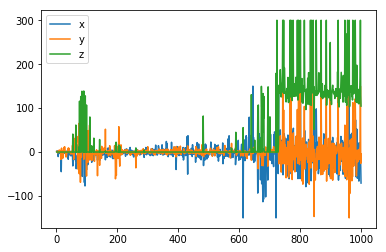

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['x'], label='x')
plt.plot(results['episode'], results['y'], label='y')
plt.plot(results['episode'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

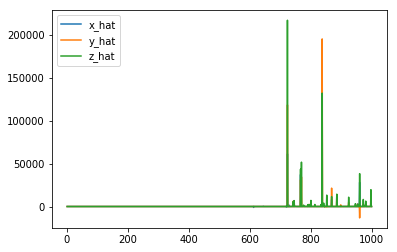

In [12]:
plt.plot(results['episode'], results['x_velocity'], label='x_hat')
plt.plot(results['episode'], results['y_velocity'], label='y_hat')
plt.plot(results['episode'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

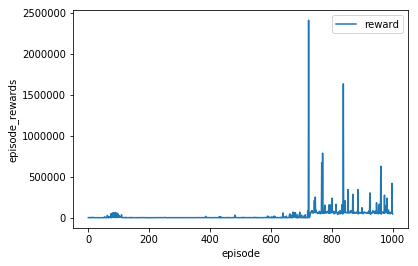

In [13]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['score'], label='reward')
plt.xlabel('episode')
plt.ylabel('episode_rewards')
plt.legend()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
I work ov axis z of the quadcopter, take off  
target_pos = np.array([0., 0., 100.])
init_pose = np.array([0.,0.,10., 0., 0., 0.]) ,
I  change the reward function as I think that the original reward function didn't really match what we wanted to accomplish  reimplement it as that:
        
        distance=abs(target_z-current_z)
        reward = np.tanh(1.-.3*distance)    
        reward += 10.0 * abs(self.sim.v[2])
        done = False
        if self.sim.pose[2] >= self.target_pos[2]: # agent has crossed the target height
            # raise TypeError
            reward += 50.0  # bonus reward
            done = True        



**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:


-I used Deep Deterministic Policy Gradients (DDPG) as recommended by the project. I did not try any other algorithms.
 I used  Actor-Critic method that provided as a template with the hyperparameters below.
 
-- Noise process
       mu = 0
       theta = 0.085
       sigma = 0.15
     
--Replay memory

       buffer_size = 100000
       batch_size = 64
       
--Algorithm parameters  

      gamma =0.70 
      tau = 0.01 

Also used the network architecture that was provided as a template .

In [14]:
last_mean = np.mean(results['score'][-10:])
print("The mean over the last 10 episodes is: ",last_mean)
first_mean = np.mean(results['score'][:10])
print("The mean over the first 10 episodes is: ",first_mean)

The mean over the last 10 episodes is:  101362.055224
The mean over the first 10 episodes is:  5771.17044161


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

-It really a hard task to learn. Not only have to select reward function to let it learn, but also need to wait till it learned
  mean rewards over the last 10 episodes is above 


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

-select the reward function is the hardest part of project and getting to know the DDPG algorithm.
